# Random Forest - baseline models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

# 1) English Premier League (EPL)

In [2]:
train=pd.read_csv("datasets/epl_data_train_onehot.csv")
test=pd.read_csv("datasets/epl_data_test_onehot.csv")

In [3]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [4]:
featuresList = list(X_train.columns) 
targetList = ["0","1","2"]

In [5]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [6]:
columns = X_train.shape[1]
columns

29

In [7]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [8]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   3.1s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   3.1s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   3.2s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.7s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.6s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.7s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.7s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   1.6s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   1.6s
[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.6s
[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.6s
[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   1.6s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   1.1s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   1.2s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   0.8s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   1.3s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   0.8s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   0.9s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   2.0s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.9s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.5s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.9s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.8s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.8s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.5s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.4s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   1.5s
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.4s
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.9s
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.4s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.1s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.1s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.1s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.3s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.9s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.7s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.8s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.1s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.1s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.1s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 
[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.1s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.1s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.3s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.3s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 
[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.3s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.6s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.3s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   2.0s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.4s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   2.4s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.9s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   2.5s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.9s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.8s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.8s
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.4s
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.4s
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.1s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.3s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.1s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   2.1s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   2.1s
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   2.1s
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.4s
[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.1s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.5s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   3.3s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   3.3s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.6s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   3.4s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.2s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.2s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 
[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.2s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.1s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.1s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.1s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.2s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.2s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.4s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.5s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.8s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.4s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.9s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   1.0s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.1s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.8s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.7s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.6s
[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.5s
[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.5s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.8s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.9s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.8s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.6s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.5s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.5s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.8s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.3s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.0s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 
[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.5s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   1.0s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   1.0s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.8s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   1.1s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.0s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.9s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.5s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   2.5s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   2.5s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   2.5s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.5s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.5s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.2s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.4s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   1.4s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.7s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.8s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.7s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.6s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.6s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.6s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 
[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.6s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.6s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.6s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.3s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 
[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.5s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.4s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.8s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.3s
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.3s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.3s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.4s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.3s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.2s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   2.0s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   1.9s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.3s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   2.0s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.0s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.1s
[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.1s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.8s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.8s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.7s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.1s
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.3s
[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.3s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.3s
[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.3s
[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.3s
[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.6s
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.8s
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.9s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.2s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.2s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.9s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.6s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   2.5s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 
[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 
[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 
[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   2.0s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   2.0s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.4s
[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   3.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 
[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   3.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   0.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   3.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.1s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.2s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.9s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.9s
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.0s
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.7s
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.9s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.8s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   2.0s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   2.0s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.7s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.8s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.8s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.9s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.8s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.8s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   2.1s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.4s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.5s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   1.9s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   2.0s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   2.1s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.9s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.9s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.9s
[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   2.3s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   2.1s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   2.0s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 
[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.1s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.2s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.1s
[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.1s
[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.1s
[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.1s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.0s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.5s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.5s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.1s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.6s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.1s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.9s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.8s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.7s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   2.0s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 
[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.8s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   2.0s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.3s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.2s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   0.9s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [9]:
rf_random.best_params_

{'n_estimators': 277,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [10]:
#best param
rf = RandomForestClassifier(n_estimators= 305,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 4,
 bootstrap= True)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [11]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("EPL Accuracy:",metrics.accuracy_score(y_test, y_pred))

EPL Accuracy: 0.5368421052631579


In [12]:
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_epl.dot', 
                feature_names = featuresList,
                class_names = targetList,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [35]:
from subprocess import call
call(['dot', '-Tpng', 'assets/tree_epl.dot', '-o', 'assets/tree_epl.png', '-Gdpi=600'])

# # Display in jupyter notebook
from IPython.display import Image
Image(filename = 'assets/tree_epl.png')

In [14]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featuresList, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DiffLP               Importance: 0.19
Variable: DiffPts              Importance: 0.14
Variable: HTGD                 Importance: 0.13
Variable: ATGD                 Importance: 0.09
Variable: DiffFormPts          Importance: 0.07
Variable: HTP                  Importance: 0.06
Variable: ATP                  Importance: 0.06
Variable: HTGS                 Importance: 0.05
Variable: ATGS                 Importance: 0.04
Variable: HTGC                 Importance: 0.03
Variable: ATGC                 Importance: 0.03
Variable: AM1                  Importance: 0.03
Variable: HM1                  Importance: 0.02
Variable: HM3                  Importance: 0.01
Variable: HM2                  Importance: 0.0
Variable: HM4                  Importance: 0.0
Variable: HM5                  Importance: 0.0
Variable: AM2                  Importance: 0.0
Variable: AM3                  Importance: 0.0
Variable: AM4                  Importance: 0.0
Variable: AM5                  Importance: 0.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

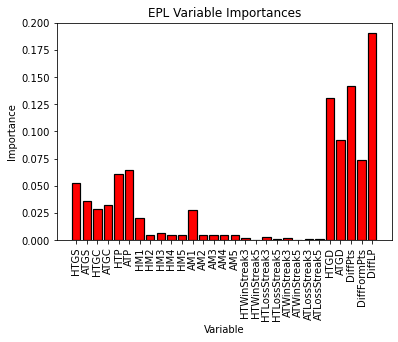

In [15]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, featuresList, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('EPL Variable Importances');


# 2) La Liga

In [16]:
## la liga
train=pd.read_csv("datasets/laliga_data_train_onehot.csv")
test=pd.read_csv("datasets/laliga_data_test_onehot.csv")

In [18]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [19]:
featuresList = list(X_train.columns) 
targetList = ["0","1","2"]

In [24]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [25]:
columns = X_train.shape[1]
columns

29

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
[CV] n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True 
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   2.6s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   2.8s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   6.3s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   6.4s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=384, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=9, bootstrap=True, total=   6.6s
[CV] n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   3.3s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   6.1s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   6.1s
[CV] n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=238, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   6.0s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   5.7s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.7s
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   5.6s
[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=340, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   5.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.8s
[CV] n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=True, total=   3.7s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   3.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   3.5s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=206, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   3.5s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   2.5s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   2.5s
[CV] n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   7.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   6.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   6.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   1.3s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   2.6s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   1.9s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=True, total=   2.0s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   3.5s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   2.3s
[CV] n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   3.0s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   2.9s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.3s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   2.5s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.4s
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.5s
[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.5s
[CV] n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=281, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, bootstrap=True, total=   2.5s
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.4s
[CV] n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=53, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.6s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.6s
[CV] n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=84, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.5s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.9s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   5.1s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.9s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=356, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.8s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.6s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 
[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.7s
[CV] n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=281, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.1s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.1s
[CV] n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 
[CV]  n_estimators=376, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, total=   2.1s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.2s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.2s
[CV] n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   1.8s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=388, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, total=   2.2s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   1.8s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=325, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, bootstrap=False, total=   1.9s
[CV] n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.1s
[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=175, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.6s
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.1s
[CV] n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.0s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.0s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.0s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.7s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.7s
[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.7s
[CV] n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.7s
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.7s
[CV] n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   2.1s
[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.0s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.3s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, total=   1.4s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.1s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.5s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.5s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.2s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=380, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, total=   2.5s
[CV] n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.2s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.0s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.0s
[CV] n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 
[CV]  n_estimators=364, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=True, total=   2.0s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.3s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.2s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.2s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   0.2s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.2s
[CV] n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=167, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, total=   1.2s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.3s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.3s
[CV] n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.8s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.8s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=313, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, total=   1.4s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=True, total=   0.8s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.2s
[CV] n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.9s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.5s
[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.9s
[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=True, total=   0.5s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   0.3s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   2.0s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   2.0s
[CV] n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=392, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   2.0s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.8s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.6s
[CV] n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=336, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   1.7s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.8s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.8s
[CV] n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.3s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 
[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.3s
[CV] n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.9s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.9s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=171, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, bootstrap=True, total=   1.6s
[CV] n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=88, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=9, bootstrap=False, total=   1.0s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.8s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.7s
[CV] n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=132, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.7s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.8s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.1s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.8s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.8s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.0s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True, total=   1.0s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   0.9s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   0.8s
[CV] n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False, total=   0.8s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=92, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.5s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min


[CV]  n_estimators=234, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   2.0s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.5s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.5s
[CV] n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.6s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.5s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.6s
[CV] n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=76, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=True, total=   0.6s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.4s
[CV] n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.4s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=372, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=6, bootstrap=True, total=   2.3s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=297, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=305, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, total=   1.8s
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.1s
[CV] n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.1s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.1s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=234, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.3s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.2s
[CV] n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   1.8s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=33, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=False, total=   0.3s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   1.9s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=258, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, total=   1.9s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.1s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.1s
[CV] n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, total=   1.0s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.8s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.8s
[CV] n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=6, bootstrap=False, total=   0.7s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.1s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=73, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, bootstrap=True, total=   0.4s
[CV] n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=210, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, total=   1.2s
[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.1s
[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=218, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.0s
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.4s
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.8s
[CV] n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=309, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=False, total=   1.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.9s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.1s
[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=195, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.9s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.8s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   1.7s
[CV] n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 
[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.1s
[CV] n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.1s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   1.8s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=True, total=   1.8s
[CV] n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   0.6s
[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   2.3s
[CV] n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   0.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   2.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=344, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=7, bootstrap=True, total=   2.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=179, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, bootstrap=False, total=   0.7s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.6s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.7s
[CV] n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.0s
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.9s
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.9s
[CV] n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=289, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   1.7s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.7s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.8s
[CV] n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=183, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   1.8s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.6s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.4s
[CV] n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.4s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=277, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.4s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.7s
[CV] n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=116, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   0.7s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.2s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.9s
[CV] n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.9s
[CV]  n_estimators=384, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=True, total=   1.9s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=17, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=25, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.4s
[CV] n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=238, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   1.4s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   1.7s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   1.6s
[CV] n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=242, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=8, bootstrap=False, total=   1.7s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.3s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   1.8s
[CV] n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.4s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=348, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   2.4s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   1.9s
[CV] n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=270, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, total=   1.8s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 
[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.1s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.2s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=246, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.4s
[CV] n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=True, total=   1.5s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.4s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.4s
[CV] n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=222, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, total=   1.3s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.1s
[CV] n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=214, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV] n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=254, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   1.1s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.2s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.6s
[CV] n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.7s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 
[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.0s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=372, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, bootstrap=True, total=   2.7s
[CV] n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=147, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=6, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=273, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=8, bootstrap=True, total=   2.6s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   2.6s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   1.0s
[CV] n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.9s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   2.2s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=3, bootstrap=False, total=   2.2s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=96, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=9, bootstrap=False, total=   0.9s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.2s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.2s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, total=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/_base.py:175: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=True, total=   0.8s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [28]:
rf_random.best_params_

{'n_estimators': 73,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7,
 'bootstrap': True}

In [29]:
#best param
rf = RandomForestClassifier(n_estimators= 297,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 4,
 bootstrap= True)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [30]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("La Liga Accuracy:",metrics.accuracy_score(y_test, y_pred))

La Liga Accuracy: 0.5421052631578948


In [31]:
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_laliga.dot', 
                feature_names = featuresList,
                class_names = targetList,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [32]:
from subprocess import call
call(['dot', '-Tpng', 'assets/tree_laliga.dot', '-o', 'assets/tree_laliga.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'assets/tree_laliga.png')

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featuresList, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DiffLP               Importance: 0.19
Variable: ATGD                 Importance: 0.16
Variable: HTGD                 Importance: 0.13
Variable: DiffPts              Importance: 0.11
Variable: HTP                  Importance: 0.08
Variable: ATP                  Importance: 0.08
Variable: ATGS                 Importance: 0.07
Variable: HTGS                 Importance: 0.04
Variable: DiffFormPts          Importance: 0.04
Variable: HTGC                 Importance: 0.02
Variable: ATGC                 Importance: 0.02
Variable: HM3                  Importance: 0.01
Variable: AM1                  Importance: 0.01
Variable: AM5                  Importance: 0.01
Variable: ATWinStreak3         Importance: 0.01
Variable: HM1                  Importance: 0.0
Variable: HM2                  Importance: 0.0
Variable: HM4                  Importance: 0.0
Variable: HM5                  Importance: 0.0
Variable: AM2                  Importance: 0.0
Variable: AM3                  Importance: 0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

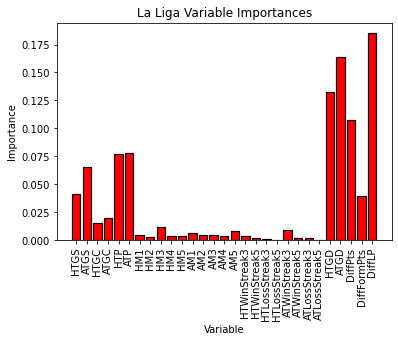

In [34]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, featuresList, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('La Liga Variable Importances');
